# Esame 10/01/22
## Parte 1

In [1]:
import pandas as pd
import numpy as np

# 1.1
Quante sono le istanze contenute nel dataset? *17998* Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? *Falso* Il dataset è bilanciato per quanto riguarda la classe da predire? *No*

In [78]:
df = pd.read_csv("Data/training_set_fd.csv",sep=';')
df

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.452180,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,M,1.0,42338,1,0,Own,Saturday,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,35579,1,1,Own,Monday,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,32953,0,1,Rent,Saturday,Local,2,Online,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,39519,1,0,Own,Friday,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0


In [7]:
len(df.where(df.isna()))

17998

In [8]:
y = df.fraud
y

0        0
1        0
2        1
3        1
4        0
        ..
17993    0
17994    1
17995    0
17996    0
17997    0
Name: fraud, Length: 17998, dtype: int64

In [9]:
for i in range(2):
    where = np.where(y == i)
    lung = len(where[0])
    print("lunghezza di "+ str(i) +" : ",lung)

lunghezza di 0 :  15182
lunghezza di 1 :  2816


## 1.2
Analizzare la variabile che indica l’età del guidatore, e considerare solo i guidatori con età inferiore a 91 anni. Rappresentare con un istogramma la distribuzione dei valori. Raggruppare poi le età in gruppi, in questo modo: gruppo1 18-21; gruppo 2 22-25; gruppo3 26-30; gruppo 4 41-40; gruppo 5 41-50; gruppo 6 51-90, visualizzare la distribuzione delle età nei gruppi e indicare la percentuale di frodi nel gruppo

In [12]:
df_age = df.loc[df.age_of_driver < 91]
ages = df_age.age_of_driver
ages

0        46
1        21
2        49
3        58
4        38
         ..
17993    69
17994    35
17995    27
17996    52
17997    61
Name: age_of_driver, Length: 17972, dtype: int64

In [21]:
# è necessario fare un bin
bins = [18, 21, 25, 30, 40, 50,90]
group_names = ["Gruppo 1","Gruppo 2","Gruppo 3", "Gruppo 4","Gruppo 5","Gruppo 6"]
cats = pd.cut(ages,bins,labels=group_names)

cats

0        Gruppo 5
1        Gruppo 1
2        Gruppo 5
3        Gruppo 6
4        Gruppo 4
           ...   
17993    Gruppo 6
17994    Gruppo 4
17995    Gruppo 3
17996    Gruppo 6
17997    Gruppo 6
Name: age_of_driver, Length: 17972, dtype: category
Categories (6, object): ['Gruppo 1' < 'Gruppo 2' < 'Gruppo 3' < 'Gruppo 4' < 'Gruppo 5' < 'Gruppo 6']

<AxesSubplot:>

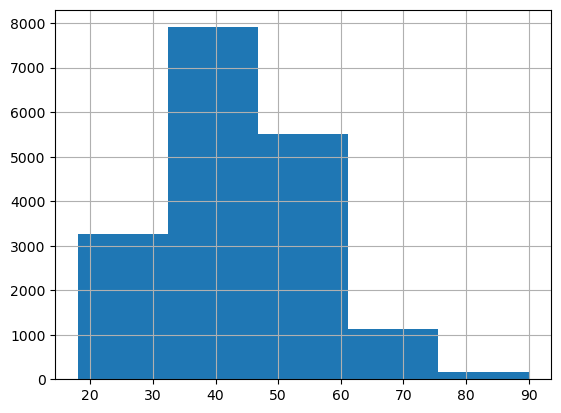

In [48]:
ages.hist(bins=5)

In [22]:
pd.value_counts(cats)

Gruppo 5    5768
Gruppo 4    5064
Gruppo 6    4712
Gruppo 3    1584
Gruppo 2     716
Gruppo 1     125
Name: age_of_driver, dtype: int64

<AxesSubplot:>

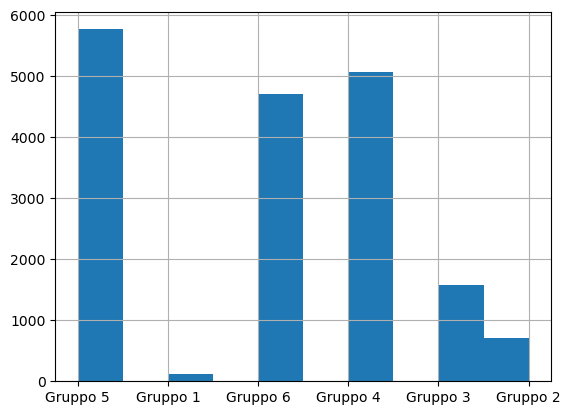

In [49]:
cats.hist()

In [ ]:
# con il group by è consigliabile per guardare poi  un unica colonna

In [ ]:
# fare 1.4 si può sovrappore  hist

# Parte 2:
## 2.1
Si vuole predire il valore di fraud sulla base degli attributi presenti nel dataset. Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le istanze che contengono valori nulli, rendere tutti gli attributi numerici, e dividerlo in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”


# Non utilizzare l'accuratezza perchè questo dataset è sbilanciato
usa la recall oppure la f1score ecc...

In [79]:
df

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.452180,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,M,1.0,42338,1,0,Own,Saturday,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,35579,1,1,Own,Monday,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,32953,0,1,Rent,Saturday,Local,2,Online,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,39519,1,0,Own,Friday,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0


In [80]:
# eliminare gli attributi non utili per la ricerca della predizione della frode
df = df.drop("vehicle_color",axis=1)
# perchè non è utile per la predizione conoscere il colore dell'auto
df = df.drop("claim_day_of_week",axis=1)
# perchè non è utile sapere quando è avvenuto il reclamo per conoscere la predizione
df = df.drop("marital_status",axis=1)
# non è utile conoscere lo stato matrimoniale per prevedere le frodi
df = df.drop("claim_number",axis=1)
# non è utile conoscere il numero del reclamo per prevedere la frode

In [81]:
df = df.drop("high_education_ind",axis=1)
# non è utile conoscere l'educazione della vittima per la predizioni delle frodi

In [82]:
df

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
0,46,M,38301,1,Rent,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,16161.33381,0
1,21,F,30445,1,Rent,Highway,1,Online,2966.024895,4.0,Large,29429.452180,28691.96422,0
2,49,F,38923,1,Own,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,22090.94758,1
3,58,F,40605,0,Own,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,38329.58106,1
4,38,M,36380,0,Rent,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,42338,0,Own,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,16868.53410,0
17994,35,F,35579,1,Own,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,31500.99689,1
17995,27,F,32953,1,Rent,Local,2,Online,2225.803056,5.0,Medium,64974.369590,44536.25506,0
17996,52,F,39519,0,Own,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,50093.75959,0


In [83]:
df = df.dropna(how='any')
df

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
0,46,M,38301,1,Rent,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,16161.33381,0
1,21,F,30445,1,Rent,Highway,1,Online,2966.024895,4.0,Large,29429.452180,28691.96422,0
2,49,F,38923,1,Own,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,22090.94758,1
3,58,F,40605,0,Own,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,38329.58106,1
4,38,M,36380,0,Rent,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,42338,0,Own,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,16868.53410,0
17994,35,F,35579,1,Own,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,31500.99689,1
17995,27,F,32953,1,Rent,Local,2,Online,2225.803056,5.0,Medium,64974.369590,44536.25506,0
17996,52,F,39519,0,Own,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,50093.75959,0


In [84]:
y = df["fraud"]
df = df.drop("fraud",axis=1)
df

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight
0,46,M,38301,1,Rent,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,16161.33381
1,21,F,30445,1,Rent,Highway,1,Online,2966.024895,4.0,Large,29429.452180,28691.96422
2,49,F,38923,1,Own,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,22090.94758
3,58,F,40605,0,Own,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,38329.58106
4,38,M,36380,0,Rent,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,25876.56319
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,42338,0,Own,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,16868.53410
17994,35,F,35579,1,Own,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,31500.99689
17995,27,F,32953,1,Rent,Local,2,Online,2225.803056,5.0,Medium,64974.369590,44536.25506
17996,52,F,39519,0,Own,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,50093.75959


In [85]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
df_ordinal = ordinal.fit_transform(df)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import  accuracy_score
from  sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_ordinal, y, train_size=0.667, test_size=0.333,
                                                    random_state=0)

classifiers = [DecisionTreeClassifier(), LogisticRegression(),DummyClassifier()]

names = ["DT","LR", "dummy"]

for model,name in zip(classifiers,names):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    matrix = confusion_matrix(y_test,pred)
    print('f1 score of '+ name +' : ',score)
    print(matrix)

f1 score of DT :  0.7322084864684263
[[4168  849]
 [ 754  215]]
f1 score of LR :  0.8381222853324424
[[5017    0]
 [ 969    0]]
f1 score of dummy :  0.8381222853324424
[[5017    0]
 [ 969    0]]
